In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.models import load_model
from contextlib import redirect_stdout
import seaborn as sn

In [34]:
from PIL import Image
import imageio

Epoch 1/15
898/898 [==============================] - 518s 560ms/step - loss: 1.8203 - accuracy: 0.2474 - val_loss: 1.7943 - val_accuracy: 0.2600
Epoch 2/15
898/898 [==============================] - 508s 565ms/step - loss: 1.5978 - accuracy: 0.3626 - val_loss: 1.4326 - val_accuracy: 0.4461
Epoch 3/15
898/898 [==============================] - 416s 463ms/step - loss: 1.3807 - accuracy: 0.4661 - val_loss: 1.2855 - val_accuracy: 0.5032
Epoch 4/15
898/898 [==============================] - 396s 441ms/step - loss: 1.2588 - accuracy: 0.5190 - val_loss: 1.2048 - val_accuracy: 0.5327
Epoch 5/15
898/898 [==============================] - 383s 427ms/step - loss: 1.1726 - accuracy: 0.5578 - val_loss: 1.1609 - val_accuracy: 0.5564
Epoch 6/15
898/898 [==============================] - 384s 428ms/step - loss: 1.0999 - accuracy: 0.5844 - val_loss: 1.1136 - val_accuracy: 0.5733
Epoch 7/15
898/898 [==============================] - 390s 434ms/step - loss: 1.0293 - accuracy: 0.6118 - val_loss: 1.1036 -

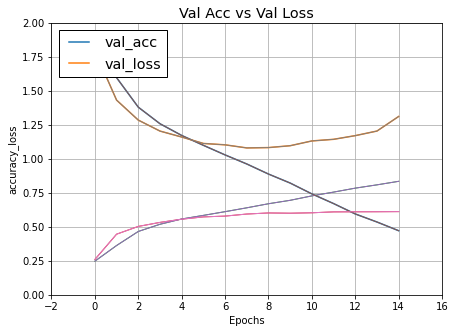

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.models import load_model
from contextlib import redirect_stdout

df = pd.read_csv('fer2013.csv')

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

dictionary = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

X_train = np.zeros((28709,48,48),dtype=np.uint8)
X_test = np.zeros((7178,48,48),dtype=np.uint8)

Y_train = np.zeros(28709,dtype=np.uint8)
Y_test = np.zeros(7178,dtype=np.uint8)

count_test = 0
for i in range(len(df)):
    txt = df['pixels'][i]
    words = txt.split()

    if i < 28709:
        for j in range(2304):
            row = j // 48
            col = j % 48
            X_train[i][row][col] = atoi(words[j])

        Y_train[i] = df['emotion'][i]
        
    else:
        for j in range(2304):
            row = j // 48
            col = j % 48
            X_test[count_test][row][col] = atoi(words[j])

        Y_test[count_test] = df['emotion'][i]
        count_test += 1
        

#Normailizing our Data so that we get pixels between 0 and 1
X_train = X_train/255
X_test = X_test/255

model_final = models.Sequential([
    #Convolutional Layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    #Dense Neural Network
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)
model_final.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model_final_details = model_final.fit(X_train, Y_train, epochs=15, validation_data=(X_test,Y_test))


train_loss = model_final_details.history['loss']
val_loss = model_final_details.history['val_loss']
train_acc = model_final_details.history['accuracy']
val_acc = model_final_details.history['val_accuracy']
xc=range(15)


plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Train Loss vs Val Loss')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Train Loss VS Val Loss Improved.png')

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Train Acc vs Val Acc')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Train Acc vs Val Acc Improved.png')

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,train_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Train Acc vs Train Loss')
plt.grid(True)
plt.legend(['train_acc','train_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Train Acc vs Train Loss Improved.png')

plt.figure(1,figsize=(7,5))
plt.plot(xc,val_acc)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Val Acc vs Val Loss')
plt.grid(True)
plt.legend(['val_acc','val_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Val Acc VS Val Loss Improved.png')

model_final.save('model_final_improved.h5')

model_hist_df = pd.DataFrame(model_final_details.history)

with open('model_history_improved.csv', mode='w') as f:
    model_hist_df.to_csv(f)

with open('model_summary_improved.txt', mode='w') as f:
    with redirect_stdout(f):
        model_final.summary()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


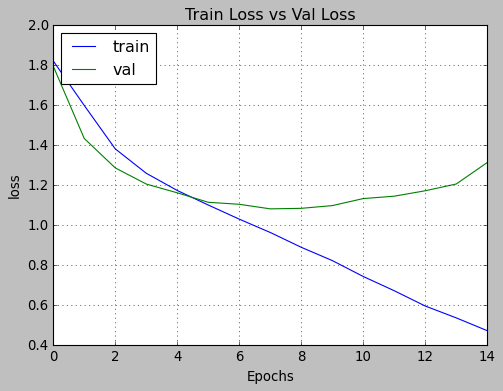

In [3]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Train Loss vs Val Loss')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Train Loss VS Val Loss Improved.png')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


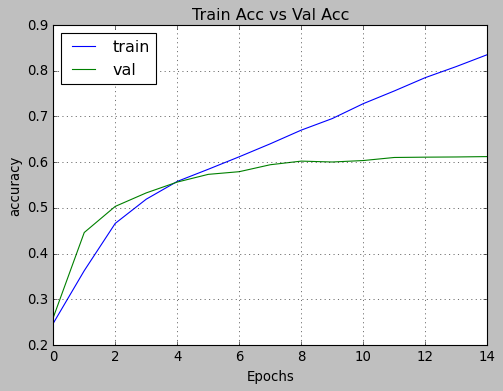

In [4]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Train Acc vs Val Acc')
plt.grid(True)
plt.legend(['train','val'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Train Acc vs Val Acc Improved.png')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


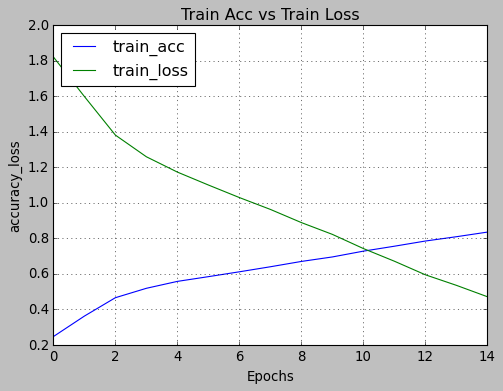

In [5]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,train_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Train Acc vs Train Loss')
plt.grid(True)
plt.legend(['train_acc','train_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Train Acc vs Train Loss Improved.png')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


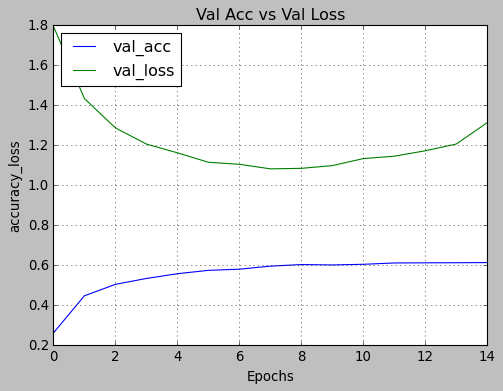

In [6]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,val_acc)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('accuracy_loss')
plt.title('Val Acc vs Val Loss')
plt.grid(True)
plt.legend(['val_acc','val_loss'], loc='upper left')
print(plt.style.available)
plt.style.use(['classic'])

plt.savefig('Val Acc VS Val Loss Improved.png')

In [7]:
Y_predicted = model_final.predict(X_test)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
confusion_matrix

225/225 [==============================] - 14s 63ms/step


<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 530,   14,  106,   57,   97,   30,  124],
       [  45,   44,    8,    4,    5,    1,    4],
       [ 140,    4,  407,   48,  167,  123,  135],
       [  66,    1,   29, 1489,   45,   46,   98],
       [ 187,    4,  172,   86,  504,   31,  263],
       [  27,    5,   73,   37,   10,  655,   24],
       [ 107,    2,   79,  112,  136,   32,  765]])>

In [8]:
import seaborn as sn

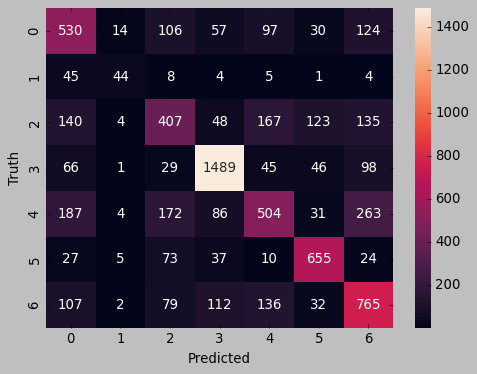

In [12]:
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.savefig('Confusion Matrix Improved.png')

In [3]:
model = tf.keras.models.load_model("model_final_improved.h5")

In [6]:
pic = Image.open("im0.png")

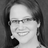

In [7]:
pic

In [70]:
pic = imageio.imread("im0.png")

In [71]:
pic

Array([[ 77,  78,  79, ...,  74,  77,  76],
       [ 83,  84,  82, ...,  75,  79,  77],
       [ 84,  87,  84, ...,  74,  79,  79],
       ...,
       [ 65,  70,  66, ...,  63,  77,  60],
       [ 66,  69,  75, ...,  45,  69,  76],
       [ 69,  80,  77, ..., 125,  67,  68]], dtype=uint8)

In [74]:
pic = pic.reshape(1,48,48)
pic = pic/255.0

In [75]:
pic.shape

(1, 48, 48)

In [76]:
pridiction_arr = model.predict(pic)

1/1 [==============================] - 0s 174ms/step


In [77]:
answer = np.argmax(pridiction_arr)

In [78]:
answer

3

In [79]:
dictionary = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [80]:
category = dictionary[answer]

In [81]:
category

'Happy'

In [82]:
pic2 = imageio.imread("im1.png")

In [83]:
pic2

Array([[ 22,  23,  23, ...,  34,  34,  34],
       [ 31,  31,  30, ...,  37,  37,  37],
       [ 58,  61,  58, ...,  45,  45,  45],
       ...,
       [165, 167, 156, ...,  48,  24,  14],
       [167, 169, 171, ...,  91,  28,  21],
       [169, 171, 172, ..., 126,  44,  25]], dtype=uint8)

In [86]:
pic2 = pic2.reshape(1,48,48)
pic2 = pic2/255.0

In [87]:
pic2.shape

(1, 48, 48)

In [88]:
pred_arr = model.predict(pic2)
pred_arr

1/1 [==============================] - 0s 26ms/step


array([[8.3644730e-01, 4.6445080e-03, 3.5261054e-02, 9.7365649e-03,
        9.5248215e-02, 8.1599673e-04, 1.7846297e-02]], dtype=float32)

In [89]:
ans = np.argmax(pred_arr)
ans

0

In [90]:
category = dictionary[ans]

In [91]:
category

'Angry'